# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [270]:
# Install required packages (if not available on server)
#!pip install getdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a}
$$

The Einstein Equations in a **homogeneous, isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model, this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\,\frac{100 \text{km}}{\text{s Mpc}}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m. 

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

In [312]:
# Hubble rate, assuming omega_r is insignificant and can be ignored
def Hubble(H0, omega_lambda,  omega_m, z): # Hubble(arg0, arg1, arg2, etc...)
    omega_k = 1- omega_lambda - omega_m
    val = omega_lambda + omega_k*(1 + z)**2 + omega_m*(1 + z)**3
    if val <= 0:  
        return np.inf  # to prevent taking the square root of a negative, and to avoid dividing by zero
    return H0 * np.sqrt(val) # in km/s/Mpc

A function for the hubble rate is defined from the equation above. The value of omega_k and the value of everything in the square root is calculated. If this value is less tahn or equal to 0, it is redefined as infinite. This prevents issues from taking the square root of a negative, and dividing by zero. Finaly, the hubble rate is calculated.

##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$ 
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times 
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \sinh\left(\sqrt{\Omega_k}D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \sin\left(\sqrt{-\Omega_k}D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_L)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in km/s/Mpc!

In [313]:
from scipy.integrate import quad
SPEED_OF_LIGHT = 299792.458 #km/s 

def integrand(z, H0, omega_lambda, omega_m):
    return 1 / Hubble(H0, omega_lambda, omega_m, z)
integral, error = quad(integrand, 0, z, args=(H0, omega_lambda, omega_m)) # calculating integral
D_z = H0 * integral

# Luminosity distance
def D_L(H0, omega_m, omega_lambda, z, D_z): # in MPc
    omega_k = 1- omega_lambda - omega_m
    front = SPEED_OF_LIGHT*(1 + z)/H0 # taking the stuff that is the same on all three out for simplicity
    if omega_k > 0:
        return   front * np.sinh(np.sqrt(omega_k) * D_z)/ np.sqrt(omega_k)
    if omega_k == 0:
        return front * D_z
    if omega_k < 0:
        return front * np.sin(np.sqrt(-omega_k) * D_z)/ np.sqrt(-omega_k)

#dummy values
z=5
H0=70
omega_lambda=0.7
omega_m=0.3

print("Hubble Rate at z =", z, ":", Hubble(H0, omega_lambda, omega_m, z), "km/s/Mpc")
print("Comoving Distance:", D_z, "Mpc")
print("Luminosity Distance", D_L(H0, omega_m, omega_lambda, z, D_z), "Mpc")

Hubble Rate at z = 5 : 566.5244919683527 km/s/Mpc
Comoving Distance: 0.9810361795259702 Mpc
Luminosity Distance 25209.192655458846 Mpc


The package needed for integration is downloaded, the integrand is defined, and the integral is calculated including its error. The comoving distance is then calculated by multiplying the value of the integral by the previously calculated hubble rate. 

Then the luminosity distance is defined for the three ranges of omega_k, using the equations from above. 

Some fairly sensible values are given to each of the variables, and the values for the hubble rate, comoving distance, and luminosity distance, are printed to check if they look sensible. These are compared to the expected values from https://www.astro.ucla.edu/~wright/CosmoCalc.html 

Using an integral function from scipy. This calculates both the integral, as well as its error. https://docs.scipy.org/doc/scipy/tutorial/integrate.html 

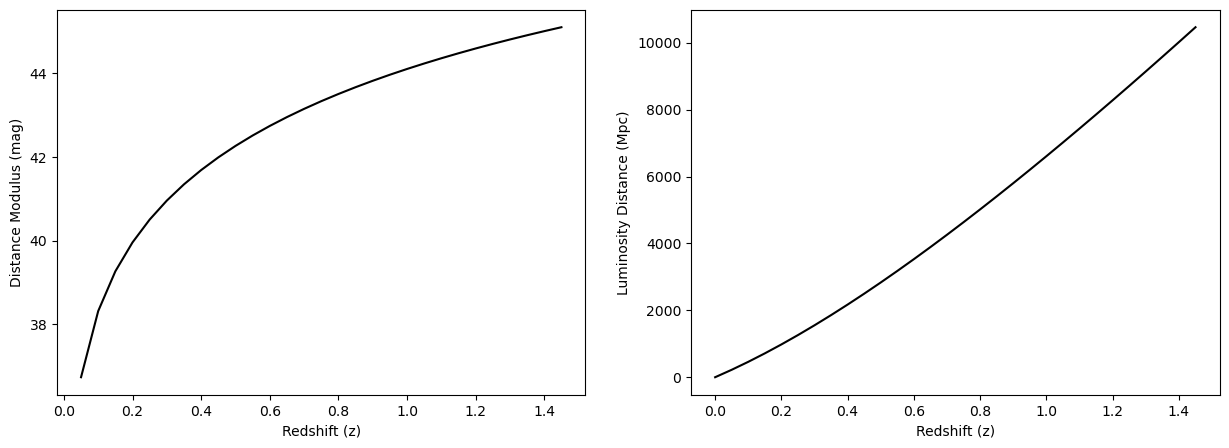

In [286]:
# Function for calculating the distance modulus
def D_mu(H0, omega_m, omega_lambda, z):
    # First calculate the comoving distance
    integral, error = quad(integrand, 0, z, args=(H0, omega_lambda, omega_m))
    d_z = integral * H0  # Comoving distance
    # Then calculate luminosity distance
    d_L = D_L(H0, omega_m, omega_lambda, z, d_z)
    # Distance modulus formula
    if d_L <= 0:
        d_L = np.nan # to prevent taking the log of 0 or a negative
    return 5 * np.log10(d_L * 10**6 /10)  # Distance modulus in mag


z_values = np.arange(0, 1.5, 0.05)  # Array of redshift values from 0 to 1.5

# Calculate distance modulus for each redshift value
modulus_distances = [D_mu(H0, omega_m, omega_lambda, z) for z in z_values]
luminosity_distances = [D_L(H0, omega_m, omega_lambda, z, quad(integrand, 0, z, args=(H0, omega_lambda, omega_m))[0] * H0) for z in z_values]

# Plotting the distance modulus vs redshift
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(z_values, modulus_distances, label="Distance Modulus", color="black")
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (mag)")


plt.subplot(1, 2, 2)
plt.plot(z_values, luminosity_distances, label="Luminosity Distance", color="black")
plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity Distance (Mpc)")
plt.show()

This defines a function for the distance modulus, from the luminosity distance function above, using the equation below. An array of values for z is created to match the limits of the graphs in the next section. These values are then used to create values for both the luminosity distance, and the distance modulus at each of these values for z. The value of D_z is calculated for each value of z. These are then stored to be able to plot.

## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [274]:
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"
# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[0])

[           nan 2.84880000e-02 3.53465834e+01 2.23905933e-01
 1.28418942e-01]


In [275]:
# pull out the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod)
zs = data.T[1] # redshift
dist_mod = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus

In [276]:
# Let's look at the data, just for fun. 
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once
import scipy.integrate as integrate

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod / 5.)

# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))

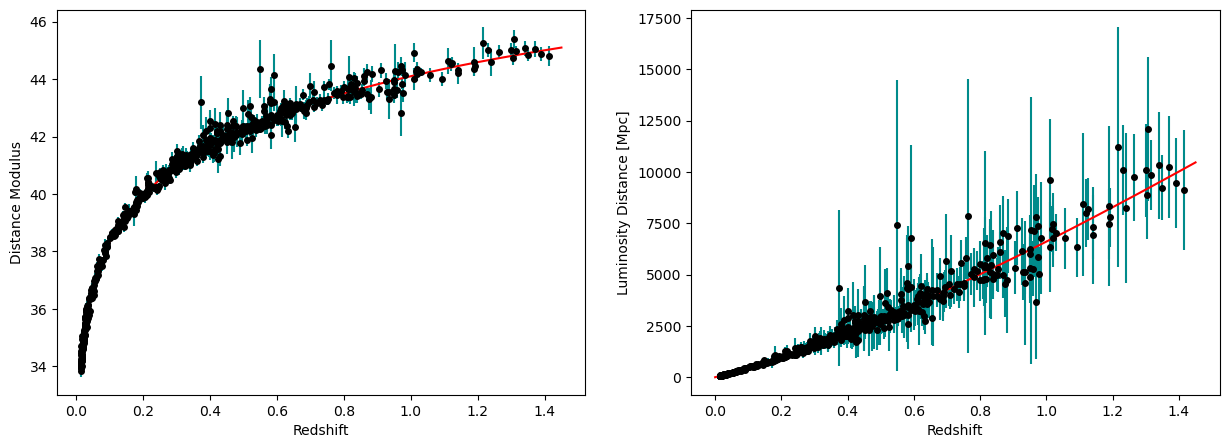

In [277]:
plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.plot(z_values, modulus_values, label="Distance Modulus", color="red")

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.plot(z_values, luminosity_distances, label="Luminosity Distance", color="red")
plt.show()

Plotting the graphs of the theoretical model (red) on top of this data. The theoretical model fits well with the data, suggesting that this model works.

## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*). 
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$. 
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.). 

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood. 

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than$10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied. 
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)
 
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if 
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
    * If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

In [306]:
def chi_squared(H0, omega_m, omega_lambda):
    modulus_distances = [D_mu(H0, omega_m, omega_lambda, z) for z in zs]
    return np.sum(((dist_mod - modulus_distances) / err_dist_mod) ** 2)



def metropolis_hastings(iterations = 2000, step_size = 0.1):
    H0 = np.random.uniform(65, 75) #initial parameters
    omega_m = np.random.uniform(0, 1)
    omega_lambda = np.random.uniform(0, 1)

    chain = [] #creates an empty chain to add to later

    for i in range(iterations):
        H0_prop = np.random.normal(H0, step_size) #proposing new values using a random number
        omega_m_prop = np.random.normal(omega_m, step_size)
        omega_lambda_prop = np.random.normal(omega_lambda, step_size)

        chi_old = chi_squared(H0, omega_m, omega_lambda) #compute chi squared values for both old and new parameters
        chi_prop = chi_squared(H0_prop, omega_m_prop, omega_lambda_prop)
    
        likelihood_ratio = np.exp((chi_old - chi_prop)/2)
        acceptance_prob = min(1, likelihood_ratio) #makes sure propability is between 0 and 1. If the new parameters have a better fit, the ratio will be greater than 1 as its chi squared will be lower. It will then take a probability of 1.

        if np.random.rand() < acceptance_prob: # if accepted, update the parameters to the new values
            H0 = H0_prop
            if omega_m_prop >=0: # omega_m can't be negative
                omega_m = omega_m_prop
            omega_lambda = omega_lambda_prop

        chain.append([H0/100, omega_m, omega_lambda]) #add these new values to the chain, converting H0 to h as h is of the same order as omega_m and omega_lambda
    return np.array(chain)
    
chain = metropolis_hastings()    
df = pd.DataFrame(chain, columns=['h', 'Omega_m', 'Omega_Lambda'])
df

,h,Omega_m,Omega_Lambda
0,0.706558,0.370217,0.504851
1,0.705344,0.438028,0.655825
2,0.705946,0.418369,0.747039
3,0.705946,0.418369,0.747039
4,0.705946,0.418369,0.747039
...,...,...,...
1995,0.700319,0.202686,0.628302
1996,0.700319,0.202686,0.628302
1997,0.700319,0.202686,0.628302
1998,0.700319,0.202686,0.628302


First defining a function for chi squred. Then creating a function for the metropolis hastings MCMC algorithm. This takes values for the number of iterations and the step size. Iterations determines the number of steps this algorithm takes. A larger values means that the values of the parameters are more likely to converge, but it also takes longer to run. Fewer iterations is much quicker, but the parameter values are less likely to converge, and are more affected by potential bias. The step size controls how big the proposed changes are. A larger value covers the parameter space faster, but it is more likely to reject the proposed values leading to poor convergence. A smaller step size provides better fine tuning, but needs more iterations to properly explore the space.

The initial parameters are first defined with values chosen to be fairly close to what would be expected. A chain is created to store these to later. New values for these parameters are created using a random normal distribution number generator, with a mean of the current value for the parameter, and the standard deviation as the step size.

The chi squared value for both the old and new parameters is calculated, and then the likelihood ratio is calculated. If this is greater than 1, the new parameters result in a better fit and so the acceptance probability will be set to 1. If the ratio is negative, the new values are a worse fit, and the acceptance probability will be less than 1.

If a random value between 0 and 1 is less than the acceptance probablility, then the new values for the parameters are accepted, and the parameters are redefined with these values. This means that if these parameters are a better fit, their acceptance probability is 1, they will definitely be accepted. It it is a worse fit, with an acceptance probability of less than 1, there is still a chance that they will be accepted. The values after each run are then appended to the chain.

The chain is then converted to a data file to easily see the values.

The values produced are close to the expected, suggesting this model is working correctly.

After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

Removed no burn in


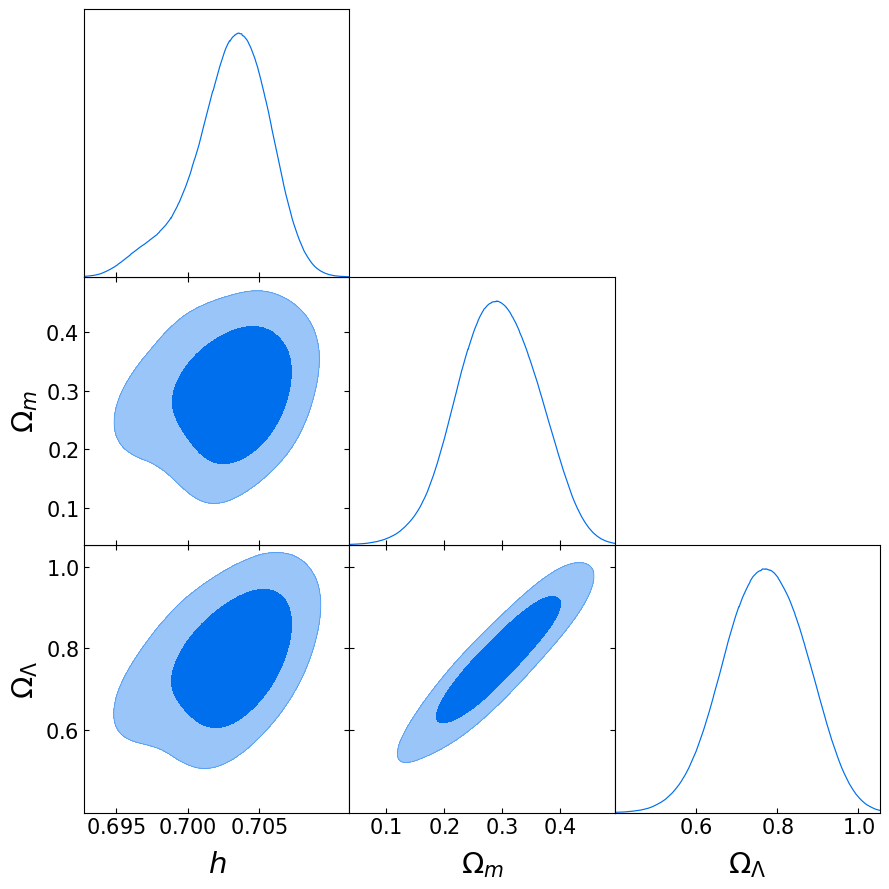

In [307]:
import getdist, IPython
from getdist import plots, MCSamples, loadMCSamples
#print('Version: ',getdist.__version__)
import pylab
from random import random
from random import gauss
# If you want to use LaTeX in the labels. Not mandatory, but it looks nice ;)
pylab.rc('text',usetex=False) 


my_labels = [r'h', r'\Omega_m', r'\Omega_\Lambda']
my_names = ['h', 'Omega_m', 'Omega_L']
my_dim = 3

my_samples = np.array(chain)  # Convert MCMC samples to numpy array
samples = MCSamples(samples=my_samples, labels=my_labels, names=my_names)

#Triangle corner plot
j = plots.getSubplotPlotter(subplot_size=3)
j.settings.axes_labelsize = 22
j.settings.axes_fontsize = 16
j.triangle_plot(samples, filled = True)

These plots allow the parameter distributions to be visualised. The plots on the diagonal show the distribution of the respective parameter. The peak is the most probable value, and the spread indicates the uncertainty. The plots off the diagonal show the correlation between the two parameters. The more circular these plots, the less correlation. If it is perfectly circular, then there is no correlation between the two parameters, they are independent. If they are irregular, then there is likely some uncertainty.

Looking at the graphs produced, the graphs on the diagonal are all fairly smooth, and are in the shape of a normal distribution as expected. The graphs on the diagonal are fairly regular in shape suggesting there are no large uncertainties. The plot comparing omega_m and omega_lambda is a tilted oval, suggesting there is strong correlation between the two parameters. This is as expected as these are effectively percentages of the respective types of matter, every omega added up is equal to 1, and so the values influence each other. The plot comparing h with each of the omegas is more circular, but is slightly tilted, suggesting there is some correlation. They are also not perfectly regular, suggesting that there is some uncertainty. This uncertainty may be explained by the fact that the distribution for h at lower values is not as smooth, suggesting these values may not have been properly sampled.

Changing the number of iteration in the Metropolis-Hastings algorithm affects how these graphs turn out. A lower number of iterations makes the graphs on the diagonals less smooth, and the graphs off the diagonal more irregular. This suggests the more iterations, the lower the uncertainty, and the more the space is explored. As stated above, more iterations also takes longer, so a compromised needed to be made.  When the number of iterations was set to the order of hundreds, it often came back with an error saying it hadn't properly converged. This was even worse as the step size increased.
1500 iterations was then tried, but the outcome was fairly irregular. 2000 iterations was chosen as it gave pretty smooth and regular graphs, without taking more than a couple of minutes to process. The precission gained by increasing this number further is counteracted by the length of time it would take to run.

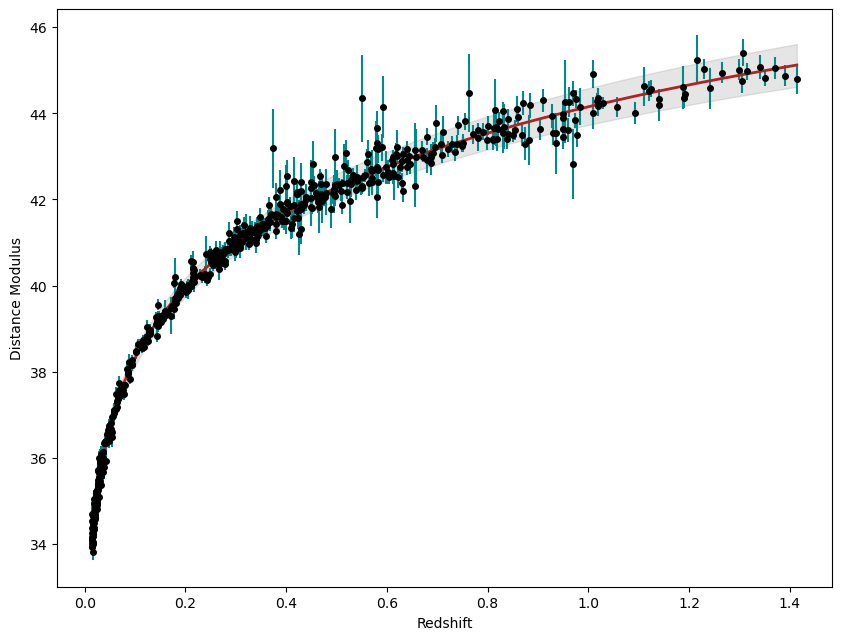

In [311]:
zsort = sorted(zs)
d_best_fit, d_min, d_max = [], [], []

for z in zsort:
    d_best_fit.append(D_mu(df['h'][1999]*100, df['Omega_m'][1999], df['Omega_Lambda'][1999], z)) #best fit model using the last row from the values calculated above
    d_min.append(D_mu(75., 0.5, 0.5, z)) #alternative models
    d_max.append(D_mu(65., 0.1, 0.9, z))


    
plt.subplots(figsize=(10, 7.5))
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")

plt.errorbar(zs, dist_mod, yerr=err_dist_mod,\
             fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.plot(zsort, d_best_fit, color='firebrick',linewidth=2.)
plt.fill_between(zsort, d_min, d_max, color='grey', alpha=.2)
plt.show()

Three different models are plotted on top of the data set. The red is the model using the parameters found, and the others are alternative models with values close to what is expected, creating minimum and maximum bounds. 

First, the values of z in the data set are ordered. For these values of z, the distance modulus is then calculated for each of these models and stored to its list. These are then plotted, with the space between the minimum and maximum models shaded. This shows that the model using the calculated parameters fits well with the origional data, as well as within the bounds of the other two models, suggesting the parameters found are fairly good.